# Notebook Setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, Math


import numpy as np
import matplotlib.pyplot as plt

import os
import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit

from utilities import jackknife

# Data Reading

In [2]:
p3fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW_extended/3PointCorrelation/"
p2fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW_extended/2PointCorrelation/"


opAnalyzer = moments_toolkit(p3fold, p2fold,
                            skip3p=False, skipop=False,
                            verbose=True,
                            fast_data_folder = "../fast_data_extended_p0_q0",
                            operator_folder= "../operator_database",
                            momentum='PX0_PY0_PZ0',
                            insertion_momentum = 'qx0_qy0_qz0',
                            tag_2p='hspectrum',
                            max_n=2 #max_n=3
                            )


Initializing the moments_toolkit class instance...


Initializing the building block class instance...


Reading the the keys of the dataset ...


Reading the 2 point and 3 point correlators from the fast access dataset ...


Reading the list of all the available operators from the database...


Class Initialization Complete!



# Std Analysis

In [3]:
p2corr = opAnalyzer.get_p2corr() #shape = (nconf, latticeT)

latticeT = opAnalyzer.latticeT
nconf = opAnalyzer.nconf

"(nconf, latticeT)"
p2corr.shape

'(nconf, latticeT)'

(212, 48)

In [4]:
mean_normal = np.mean(p2corr, axis=0)
std_normal = np.std(p2corr, axis=0, ddof=1) /np.sqrt(nconf)

mean_jack, std_jack, cov_jack = jackknife(p2corr, lambda x: np.mean(x, axis=0), jack_axis_list=0, binsize=1, time_axis=-1)

In [5]:
##function that resample the given arrays along the innermost axis (credit: https://stackoverflow.com/a/53236272)
#def resamples_last_axis(arr, reps):
#    """
#    Function used to resample with replacement the innermost axis of the given array (credit: https://stackoverflow.com/a/53236272)
#    
#    Input:
#        - arr: the input array to be resampled (along the innermost axis)
#        - reps: the number of resamples that is required
#    
#    Output:
#        - resampled_array: the input arry resampled along the last axis, shape = (reps,) + arr.shape
#    """
#
#    n = arr.shape[-1]
#
#
#    # create an array to shift random indexes as needed
#    shift = np.repeat(np.arange(0, arr.size, n), n).reshape(arr.shape)
#
#    # get a flat view of the array
#    arrflat = arr.ravel()
#
#    # sample the array by generating random ints and shifting them appropriately
#    return np.array([arrflat[np.random.randint(0, n, arr.shape) + shift] 
#                     for i in range(reps)])
#
#
##function that generates the bootstap resampled of the given array along a specified axis
#def bootstrap_resamples(array: np.ndarray, axis:int, Nres:int):
#    """
#    Function performing the bootstrap resampling (sample with replacement) of the input array along a given axis
#    (obtain with minimal modifications to the code given in: https://stackoverflow.com/a/53236272)
#    
#    Input:
#        - array: input array to be resampled
#        - axis: the axis over which to perform the resampling with replacement
#        - Nres: the number of required resamples
#    
#    Output:
#        - resamples_array: the array with the resamples, shape = (Nres,) + array.shape
#    """
#
#    #we read the number of dimensions of the input array
#    ndim = array.ndim
#
#    #input control on the axis parameter
#    if axis >= ndim or axis<-ndim:
#        raise ValueError(f"The input array has shape {array.shape}, so axis can take values in the range {-ndim}, ..., {ndim}, extremes included, but axis={axis} were given.")
#    
#    #cast axis to a postive number in the correct range
#    axis = (axis + array.ndim) % array.ndim
#
#    #we swap the array as to have the axis to resample on the last axis
#    swapped_array = np.swapaxes(array,axis1=axis, axis2=-1)
#
#    #we resample along the last axis
#    resamples_array = resamples_last_axis(swapped_array,Nres)
#
#    #we swap again the input axis with the last one (with the +1 taking into account now there is also the resample dimension)
#    return np.swapaxes(resamples_array, axis1=axis+1, axis2=-1)

In [6]:
##function that generates the bootstap resampled of the given array along a specified axis
#def bootstrap(array: np.ndarray, axis:int, Nres:int):
#    """
#    Function performing the bootstrap resampling (sample with replacement) of the input array along a given axis
#    (obtain with minimal modifications to the code given in: https://stackoverflow.com/a/53236272)
#    
#    Input:
#        - array: input array to be resampled
#        - axis: the axis over which to perform the resampling with replacement
#        - Nres: the number of required resamples
#    
#    Output:
#        - resamples_array: the array with the resamples, shape = (Nres,) + array.shape
#    """
#
#    #we read the number of dimensions of the input array
#    ndim = array.ndim
#
#    #input control on the axis parameter
#    if axis >= ndim or axis<-ndim:
#        raise ValueError(f"The input array has shape {array.shape}, so axis can take values in the range {-ndim}, ..., {ndim}, extremes included, but axis={axis} were given.")
#    
#    #cast axis to a postive number in the correct range
#    axis = (axis + array.ndim) %array.ndim
#
#    #we swap the array as to have the axis to resample on the last axis
#    swapped_array = np.swapaxes(array,axis1=axis, axis2=-1)
#
#    #we resample along the last axis
#    resamples_array = resamples_last_axis(swapped_array,Nres)
#
#    #we swap again the input axis with the last one (with the +1 taking into account now there is also the resample dimension)
#    return np.swapaxes(resamples_array, axis1=axis+1, axis2=-1)

In [24]:
from utilities import bootstrap_resamples

Nres=150

p2corr_res = bootstrap_resamples(in_array_list=p2corr, observable= lambda x: np.mean(x,axis=0), bootstrap_axis_list=0, Nres=Nres, sample_per_resamples=200)

"(Nres, latticeT)"
p2corr_res.shape



'(Nres, latticeT)'

(150, 48)

In [25]:
std_bst = np.std( p2corr_res, axis=0, ddof=1)

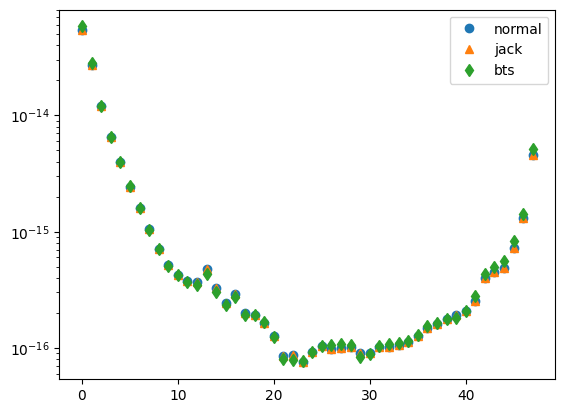

In [26]:
_ = plt.plot(np.arange(latticeT), std_normal, 'o',label="normal")

_ = plt.plot(np.arange(latticeT), std_jack, '^', label="jack")

_ = plt.plot(np.arange(latticeT), std_bst, 'd', label="bts")

_ = plt.legend()

plt.yscale("log")

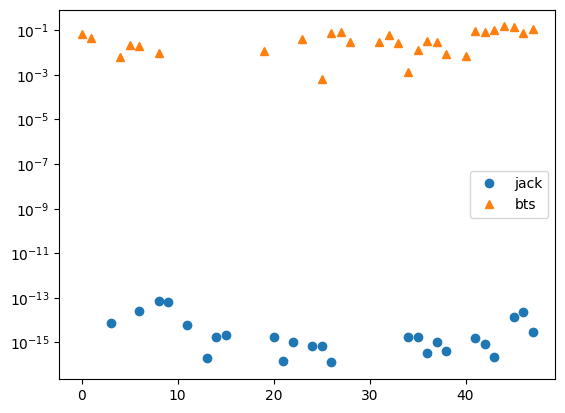

In [27]:
_ = plt.plot(np.arange(latticeT), (std_jack-std_normal)/std_normal, 'o',label="jack")

_ = plt.plot(np.arange(latticeT), (std_bst-std_normal)/std_normal, '^',label="bts")

_ = plt.legend()


plt.yscale("log")

In [31]:
Nres=150

p2corr_res = bootstrap_resamples(in_array_list=p2corr, observable= lambda x: x, bootstrap_axis_list=0, Nres=Nres, sample_per_resamples=20)

"(Nres, Nconf, latticeT)"
p2corr_res.shape

'(Nres, Nconf, latticeT)'

(150, 20, 48)

In [35]:
obs_total = np.mean(p2corr, axis=0)

obs_resamp = np.asarray( [ np.mean(p2,axis=0) for p2 in p2corr_res] )


boot_mean = np.mean(obs_resamp, axis=0)

bias = boot_mean-obs_total

bias / obs_total

array([-4.60171774e-06, -4.39165112e-04, -6.05608776e-04, -1.03490041e-03,
       -1.12885809e-03, -4.09590684e-04,  3.15353625e-04, -5.65464655e-04,
        3.70911690e-05,  3.33257883e-03,  5.60052566e-03,  1.07797378e-02,
        2.50001418e-02,  5.68127901e-02,  5.01108470e-02,  5.58441379e-02,
        1.41517925e-01,  3.18880323e-02,  2.94265170e-01,  6.88677723e-02,
       -1.07087380e-01,  3.13712849e+00, -4.42604810e-01, -1.07556430e-01,
        7.17484324e-02,  3.27858771e-01,  9.92920711e-01,  1.00310541e+00,
       -3.53066661e+00, -4.58764938e-02, -7.92890989e-02, -1.44655040e-01,
       -2.19221577e-01, -1.58092745e-01, -2.50752026e-02,  1.18020823e-01,
        4.62118286e-02, -2.42156247e-01, -4.16521090e-01,  2.07196262e-02,
        1.44309129e-02,  1.67582542e-02,  2.22259463e-03, -1.35055241e-02,
        4.49974246e-03,  4.61323818e-03,  3.11537925e-04,  1.90676458e-04])

In [16]:
Nconf = 10
latT = 12

Nres = 6
Conf_per_Res = 8

ok = np.arange(1,Nconf*latT+1).reshape((Nconf,latT)) #say Nconf=10, latT=12
ok

selection = np.random.randint(0,Nconf, Conf_per_Res) #one selection = one resample
selection

np.take( ok ,indices=np.arange(ok.shape[0]), axis=1)[selection]

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [ 13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24],
       [ 25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36],
       [ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48],
       [ 49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72],
       [ 73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84],
       [ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96],
       [ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108],
       [109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]])

array([3, 6, 0, 4, 6, 0, 1, 1])

array([[37, 38, 39, 40, 41, 42, 43, 44, 45, 46],
       [73, 74, 75, 76, 77, 78, 79, 80, 81, 82],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [49, 50, 51, 52, 53, 54, 55, 56, 57, 58],
       [73, 74, 75, 76, 77, 78, 79, 80, 81, 82],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22]])

In [17]:
Nconf = 10
latT = 12
Nop = 2

Nres = 3
Conf_per_Res = 8

conf_axis=1
ok = np.arange(1,Nconf*Nop*latT+1).reshape((Nop,Nconf,latT)) #say Nconf=10, latT=12
ok

selection = np.random.randint(0,Nconf, Conf_per_Res) #one selection = one resample
selection

#np.take( ok ,indices=np.arange(ok.shape[-1]), axis=-1)#[selection]
#np.take( ok ,indices=np.arange(ok.shape[0]), axis=-1)#[selection].shape
#ok[selection]
#ok[selection].shape

np.take(ok, indices = selection, axis=conf_axis)
np.take(ok, indices = selection, axis=conf_axis).shape

array([[[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
        [ 13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24],
        [ 25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36],
        [ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48],
        [ 49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
        [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72],
        [ 73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84],
        [ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96],
        [ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108],
        [109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]],

       [[121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132],
        [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144],
        [145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156],
        [157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168],
        [169, 170,

array([2, 0, 8, 0, 4, 9, 3, 3])

array([[[ 25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36],
        [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
        [ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108],
        [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
        [ 49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
        [109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120],
        [ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48],
        [ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48]],

       [[145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156],
        [121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132],
        [217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228],
        [121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132],
        [169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180],
        [229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240],
        [157, 158,

(2, 8, 12)

In [18]:
ok.shape[:1] + (8,) + ok.shape[1+1:] 

(2, 8, 12)

In [19]:
selection_list = [np.random.randint(0,Nconf, Conf_per_Res) for _ in range(Nres)]

selection_list

[array([9, 3, 7, 7, 3, 4, 0, 3]),
 array([5, 0, 5, 7, 4, 3, 4, 7]),
 array([6, 0, 1, 1, 2, 4, 0, 2])]

In [20]:
np.take(ok, indices = selection_list, axis=conf_axis).shape
np.moveaxis( np.take(ok, indices = selection_list, axis=conf_axis), source=conf_axis, destination=0).shape
np.moveaxis( np.take(ok, indices = selection_list, axis=conf_axis), source=conf_axis, destination=0)

(2, 3, 8, 12)

(3, 2, 8, 12)

array([[[[109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120],
         [ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48],
         [ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96],
         [ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96],
         [ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48],
         [ 49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
         [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
         [ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48]],

        [[229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240],
         [157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168],
         [205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216],
         [205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216],
         [157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168],
         [169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180],
    

In [21]:
from utilities import bootstrap_resamples

In [22]:
Nconf=10
latT=12

Nres = 3
sampl_per_resample=9

ok = np.arange(1,Nconf*latT+1).reshape((Nconf,latT))
ok

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [ 13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24],
       [ 25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36],
       [ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48],
       [ 49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72],
       [ 73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84],
       [ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96],
       [ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108],
       [109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]])

In [23]:
resamp = bootstrap_resamples(in_array_list=ok, observable= lambda x: x-1, bootstrap_axis_list=0, Nres=Nres, sample_per_resamples=sampl_per_resample)

resamp.shape
resamp

(3, 9, 12)

array([[[ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
        [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107],
        [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
        [ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47],
        [ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23],
        [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35],
        [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
        [ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83],
        [ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23]],

       [[ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83],
        [ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47],
        [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71],
        [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
        [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
        [ 60,  61,